## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = mouse_metadata.merge(study_results, how = "left")

# Display the data table for preview
merged_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data["Mouse ID"].unique())

249

In [7]:
#Checking to make sure we dropped the 5 duplicates found above. The number of mice is the same because we only dropped the
#second copy of mouse ID g989
cleaned_data.shape

(1888, 8)

In [8]:

merged_data.shape

(1893, 8)

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean" : cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),
                         "Median" : cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),
                         "Variance" : cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),
                         "STD" : cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),
                         "SEM" : cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
})
summary_stats


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Timepoints per Drug Regimen (All Mice)'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

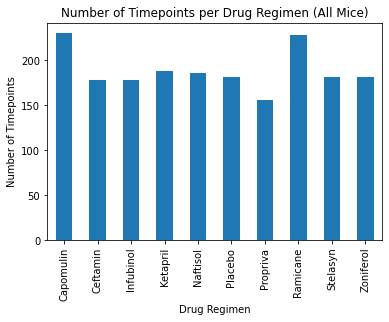

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

cleaned_data.groupby("Drug Regimen").Timepoint.count().plot.bar(ylabel="Number of Timepoints",
                                                                title = 'Number of Timepoints per Drug Regimen (All Mice)')

Text(0.5, 1.0, 'Number of Timepoints per Drug Regimen(All Mice)')

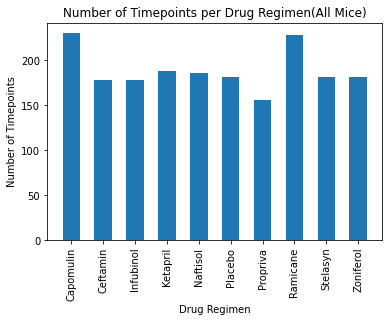

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#creating range of numbers based on number of data to be displayed on the bar chart
ypos = np.arange(len(cleaned_data["Drug Regimen"].unique()))

#obtaining a list of our labels that correspond with the datapoints and sorting them alphabetically to match the data
labels = cleaned_data["Drug Regimen"].unique()
labels.sort()

#retreiving the timepoints from our cleaned data
graph_data = cleaned_data.groupby("Drug Regimen").Timepoint.count()

#creating our bar labels and rotating 90 degrees for better readability
plt.xticks(ypos, labels, rotation = 90)

#giving pyplot the data we stored in graph_data as well as the ypos range so that it knows how many bars to store the data in
#also adjusting bar width for better asthetics
plt.bar(ypos, graph_data, width = 0.55)

#giving the y axis a label
plt.ylabel('Number of Timepoints')

#giving the x axis a label
plt.xlabel('Drug Regimen')

#giving the graph a title
plt.title('Number of Timepoints per Drug Regimen(All Mice)')

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#creating series that contains gender data
gender_data_unique = cleaned_data.drop_duplicates("Mouse ID").Sex.value_counts()
gender_data_unique

Male      125
Female    124
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Male vs Female Distribution'}, ylabel='Sex'>

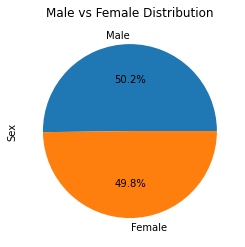

In [14]:
#displaying data as pie chart
gender_data_unique.plot.pie(title = "Male vs Female Distribution", autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

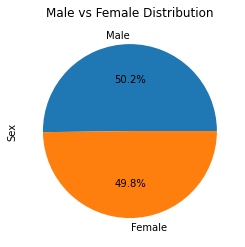

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_data_unique, labels = ["Male", "Female"], autopct='%1.1f%%')

#giving the chart a title
plt.title("Male vs Female Distribution")

#giving the chart a y label, like above
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = cleaned_data.groupby("Mouse ID").Timepoint.max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoints_merged = cleaned_data.merge(max_timepoints, how = "right", on = ["Mouse ID", "Timepoint"])

In [165]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
tumor_data_merged = max_timepoints_merged[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [166]:
#looping through each of the most promising treatments to determine their final tumor quartiles, iqr, and outliers
for t in treatments:
    
    #filtering for drugs only in our 'treatment' list
    drug_data = tumor_data_merged.loc[tumor_data_merged["Drug Regimen"] == t, :]
    
    #appending our list of final tumor size per drug
    tumor_vol_data.append(drug_data['Tumor Volume (mm3)'])
    
    #calculating quartiles using .quartile pandas function on tumor volume column
    quartiles = drug_data['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    
    #calculating the lower, upper and median quartiles
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    median = quartiles[0.5]
    
    #calculating iqr
    iqr = upper - lower
    
    #storing outlier bounds to determine potential outliers
    outlier_upper = upper + (1.5 * iqr)
    outlier_lower = lower - (1.5 * iqr)
    
    #using formated print statements to print results
    print(f'Final tumor volume statistics for {t}:')
    print(f"The lower quartile for {t} tumor size is {lower}(mm3)")
    print(f"The median quartile for {t} tumor size is {median}(mm3)")
    print(f"The upper quartile for {t} tumor size is {upper}(mm3)")
    print(f"The IQR for {t} tumor size is {iqr}(mm3)")
    
    #creating boolean array and checking the number of trues for each to determine how many 
    print(f"There are {sum(drug_data['Tumor Volume (mm3)'] > outlier_upper)} upper outliers for {t}")
    print(f"There are {sum(drug_data['Tumor Volume (mm3)'] < outlier_lower)} lower outliers for {t}")
    print()
    print()

Final tumor volume statistics for Capomulin:
The lower quartile for Capomulin tumor size is 32.37735684(mm3)
The median quartile for Capomulin tumor size is 38.125164399999996(mm3)
The upper quartile for Capomulin tumor size is 40.1592203(mm3)
The IQR for Capomulin tumor size is 7.781863460000004(mm3)
There are 0 upper outliers for Capomulin
There are 0 lower outliers for Capomulin


Final tumor volume statistics for Ramicane:
The lower quartile for Ramicane tumor size is 31.56046955(mm3)
The median quartile for Ramicane tumor size is 36.56165229(mm3)
The upper quartile for Ramicane tumor size is 40.65900627(mm3)
The IQR for Ramicane tumor size is 9.098536719999998(mm3)
There are 0 upper outliers for Ramicane
There are 0 lower outliers for Ramicane


Final tumor volume statistics for Infubinol:
The lower quartile for Infubinol tumor size is 54.04860769(mm3)
The median quartile for Infubinol tumor size is 60.16518046(mm3)
The upper quartile for Infubinol tumor size is 65.52574285(mm3)
T

([<matplotlib.axis.XTick at 0x21801724670>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

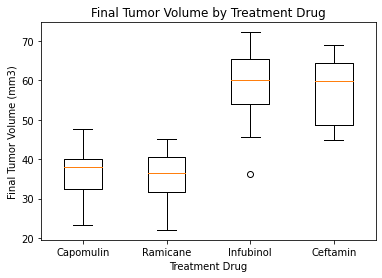

In [173]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#passing tumor_vol_data to matplot.boxplot
plt.boxplot(tumor_vol_data)

#setting title
plt.title("Final Tumor Volume by Treatment Drug")

#setting y label
plt.ylabel("Final Tumor Volume (mm3)")

#setting x label
plt.xlabel("Treatment Drug")

#like with bar graph earlier, defining the x axis labels and mapping them to treatments list
plt.xticks([1,2,3,4], treatments)

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse m601 Treated with Capulomin')

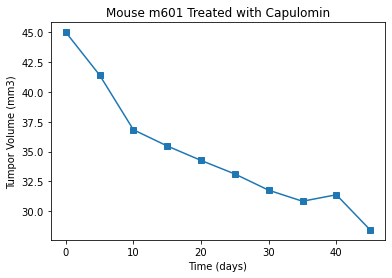

In [194]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#chose a mouse at random treated with capomulin and created filtered dataframe
capulomin_mouse = cleaned_data.loc[cleaned_data["Mouse ID"] == "m601"]

#plotting timepoint vs tumor volume, shows tumor change in volume over time. marker attribute set to 's' makes points into squares
plt.plot(capulomin_mouse["Timepoint"], capulomin_mouse["Tumor Volume (mm3)"], marker = 's')

#labeling x and y axes, creating title
plt.xlabel("Time (days)")
plt.ylabel("Tumpor Volume (mm3)")
plt.title("Mouse m601 Treated with Capulomin")

Text(0, 0.5, 'Tumor Volume (mm3)')

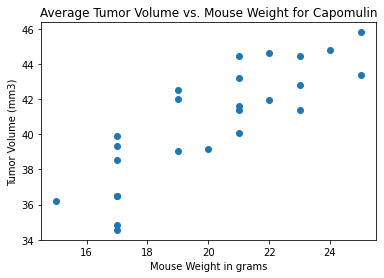

In [205]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#storing data filtered to capomulin
capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]

#grouping by mouse ID and filtering to the mean of weight and tumor volume
avg_by_mouseid = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

#plotting using matplotlib scatter
plt.scatter(avg_by_mouseid["Weight (g)"], avg_by_mouseid["Tumor Volume (mm3)"])

#applying x and y labels, title
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Mouse Weight in grams")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [211]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = avg_by_mouseid["Weight (g)"]
y = avg_by_mouseid["Tumor Volume (mm3)"]

#using scipy stats' pearsonr correlation function to calculate correlation coefficient using the x and y from previous plot
correlation = st.stats.pearsonr(x, y)
print(f'The Correlation coefficient (r value) for mouse weight vs tumor volume is: {correlation[0]}')

The Correlation coefficient(r value) for mouse weight vs tumor volume is: 0.8419363424694717


In [228]:
#using the linregress function from scipy stats to perform a linear regression on the data
linreg = st.stats.linregress(x, y)
linreg

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [229]:
#storing slope and intercept for plotting regression line
slope = linreg[0]
intercept = linreg[1]

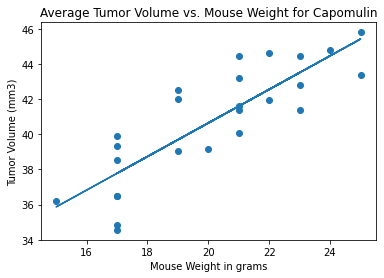

In [230]:
plt.scatter(x,y)

#applying x and y labels, title
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Mouse Weight in grams")
plt.ylabel("Tumor Volume (mm3)")
#plotting the regression line over scatter plot using y=mx+b and plugging in slope and intercept given by regression model.
plt.plot(x,x * slope + intercept)
